<a href="https://colab.research.google.com/github/shajeeraza12/shajeeraza12/blob/main/AOATask6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: Shajee Raza (Сайид мухаммад шаджи раза)
# Title: Algorithms on graphs. Path search algorithms on weighted graphs

The goal of this assignment is to implement and analyze different shortest path algorithms (Dijkstra, Bellman-Ford, A*) to understand their performance on graph-based problems. Additionally, the assignment involves experimenting with different data structures and design techniques to evaluate their efficiency in solving real-world pathfinding tasks.

# Brief theoretical part
**Graph and Shortest Path Problem:**

A graph consists of vertices (nodes) connected by edges (links). The shortest path problem involves finding the shortest path from a starting vertex to a target vertex, minimizing the total edge weight (distance or cost). This is fundamental in network routing, mapping, and transportation systems.

**1: Dijkstra’s Algorithm:**

*Description:*

A greedy algorithm that finds the shortest path from a single source to all other vertices in a graph with non-negative edge weights.

*Methodology:*

Maintains a priority queue to explore the closest vertices first, relaxing edges iteratively until the shortest paths are determined.

**2: Bellman-Ford Algorithm:**

*Description:*

Solves the shortest path problem even with negative edge weights and detects negative-weight cycles.

*Methodology:*

Repeatedly relaxes all edges, updating the shortest path estimates. It performs this for |V| - 1 iterations (where V is the number of vertices).

3: A Algorithm*: **bold text**

*Description:*

An informed search algorithm that uses heuristics to guide the search towards the goal efficiently. It is often used in pathfinding applications, like games or robotics.

*Methodology:*

Combines the actual distance from the start node (g) and the estimated distance to the goal node (h) to calculate a total cost (f = g + h). It uses a priority queue to explore nodes in the order of increasing f.

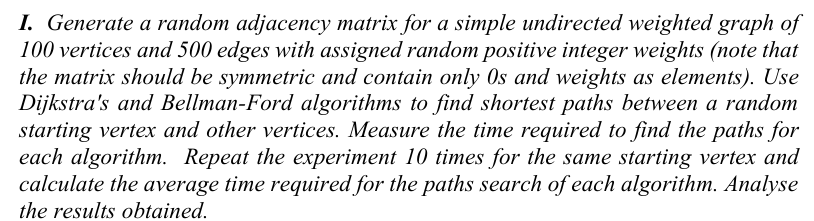

# Importing necessary libraries

In [12]:
import numpy as np
import heapq
import time

# Generating a random adjacency matrix

In [7]:
def generate_adjacency_matrix(num_vertices=100, num_edges=500, max_weight=20):
    """
    Generates a random symmetric adjacency matrix for an undirected graph.
    """
    # Create a matrix filled with 0s
    matrix = np.zeros((num_vertices, num_vertices), dtype=int)

    edges = 0
    while edges < num_edges:
        # Randomly pick two vertices
        i, j = np.random.randint(0, num_vertices, 2)

        # Ensure i != j (no self-loops) and no duplicate edges
        if i != j and matrix[i][j] == 0:
            weight = np.random.randint(1, max_weight + 1)  # Random weight
            matrix[i][j] = weight
            matrix[j][i] = weight  # Ensure symmetry
            edges += 1

    return matrix

# Generate the adjacency matrix
adj_matrix = generate_adjacency_matrix()
print("Generated adjacency matrix of size:", adj_matrix.shape)

Generated adjacency matrix of size: (100, 100)


# Dijkstra's Algorithm

In [10]:
def dijkstra(adj_matrix, start_vertex):
    """
    Implements Dijkstra's algorithm to find shortest paths from a start vertex.
    """
    num_vertices = len(adj_matrix)
    distances = [float('inf')] * num_vertices  # Initialize distances to infinity
    distances[start_vertex] = 0  # Distance to self is 0
    priority_queue = [(0, start_vertex)]  # (distance, vertex)

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # Skip if this distance is outdated
        if current_distance > distances[current_vertex]:
            continue

        for neighbor in range(num_vertices):
            weight = adj_matrix[current_vertex][neighbor]
            if weight > 0:  # If there's an edge
                new_distance = current_distance + weight
                if new_distance < distances[neighbor]:  # Relaxation step
                    distances[neighbor] = new_distance
                    heapq.heappush(priority_queue, (new_distance, neighbor))

    return distances

# Run Dijkstra's algorithm
start_vertex = np.random.randint(0, len(adj_matrix))  # Random starting vertex
dijkstra_distances = dijkstra(adj_matrix, start_vertex)
print(f"Shortest distances from vertex {start_vertex} (Dijkstra):", dijkstra_distances)


Shortest distances from vertex 42 (Dijkstra): [10, 11, 16, 7, 17, 13, 14, 14, 17, 11, 13, 11, 16, 14, 14, 10, 16, 18, 21, 19, 16, 14, 12, 18, 18, 13, 14, 21, 10, 11, 15, 14, 13, 13, 13, 11, 15, 16, 12, 14, 16, 19, 0, 11, 13, 11, 12, 16, 15, 13, 15, 7, 21, 17, 10, 12, 15, 15, 11, 12, 17, 19, 14, 14, 13, 11, 8, 12, 13, 14, 7, 19, 15, 17, 17, 8, 15, 11, 17, 20, 1, 9, 17, 16, 10, 17, 13, 13, 8, 21, 15, 14, 12, 18, 13, 11, 18, 3, 16, 16]


# Bellman-Ford Algorithm

In [11]:
def bellman_ford(adj_matrix, start_vertex):
    """
    Implements Bellman-Ford algorithm to find shortest paths from a start vertex.
    """
    num_vertices = len(adj_matrix)
    distances = [float('inf')] * num_vertices
    distances[start_vertex] = 0  # Distance to self is 0

    # Relax edges |V|-1 times
    for _ in range(num_vertices - 1):
        for u in range(num_vertices):
            for v in range(num_vertices):
                weight = adj_matrix[u][v]
                if weight > 0 and distances[u] + weight < distances[v]:
                    distances[v] = distances[u] + weight

    # Check for negative weight cycles (not required as weights are positive)
    for u in range(num_vertices):
        for v in range(num_vertices):
            weight = adj_matrix[u][v]
            if weight > 0 and distances[u] + weight < distances[v]:
                raise ValueError("Graph contains a negative-weight cycle")

    return distances

# Run Bellman-Ford algorithm
bellman_ford_distances = bellman_ford(adj_matrix, start_vertex)
print(f"Shortest distances from vertex {start_vertex} (Bellman-Ford):", bellman_ford_distances)

Shortest distances from vertex 42 (Bellman-Ford): [10, 11, 16, 7, 17, 13, 14, 14, 17, 11, 13, 11, 16, 14, 14, 10, 16, 18, 21, 19, 16, 14, 12, 18, 18, 13, 14, 21, 10, 11, 15, 14, 13, 13, 13, 11, 15, 16, 12, 14, 16, 19, 0, 11, 13, 11, 12, 16, 15, 13, 15, 7, 21, 17, 10, 12, 15, 15, 11, 12, 17, 19, 14, 14, 13, 11, 8, 12, 13, 14, 7, 19, 15, 17, 17, 8, 15, 11, 17, 20, 1, 9, 17, 16, 10, 17, 13, 13, 8, 21, 15, 14, 12, 18, 13, 11, 18, 3, 16, 16]


# Measuring and Compareing Execution Times

In [13]:
def measure_execution_time(adj_matrix, start_vertex, num_runs=10):
    """
    Measures and compares execution times of Dijkstra's and Bellman-Ford algorithms.
    """
    dijkstra_times = []
    bellman_ford_times = []

    for _ in range(num_runs):
        # Measure Dijkstra's time
        start_time = time.time()
        dijkstra(adj_matrix, start_vertex)
        dijkstra_times.append(time.time() - start_time)

        # Measure Bellman-Ford time
        start_time = time.time()
        bellman_ford(adj_matrix, start_vertex)
        bellman_ford_times.append(time.time() - start_time)

    avg_dijkstra_time = sum(dijkstra_times) / num_runs
    avg_bellman_ford_time = sum(bellman_ford_times) / num_runs

    return avg_dijkstra_time, avg_bellman_ford_time

# Compare execution times
avg_dijkstra_time, avg_bellman_ford_time = measure_execution_time(adj_matrix, start_vertex)
print(f"Average execution time (Dijkstra): {avg_dijkstra_time:.6f} seconds")
print(f"Average execution time (Bellman-Ford): {avg_bellman_ford_time:.6f} seconds")

Average execution time (Dijkstra): 0.004828 seconds
Average execution time (Bellman-Ford): 0.383351 seconds


The results show that Dijkstra's algorithm is significantly faster than Bellman-Ford, as it optimally uses a priority queue for edge relaxation. Bellman-Ford is slower due to its exhaustive edge relaxation process, making it less efficient for dense graphs with non-negative weights.

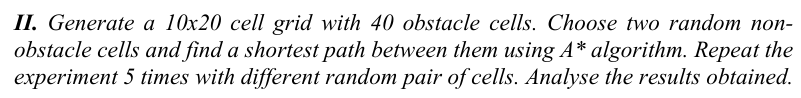

# Generating a 10x20 Grid with Obstacles

In [14]:
def generate_grid(rows=10, cols=20, num_obstacles=40):
    grid = np.zeros((rows, cols), dtype=int)

    # Place obstacles randomly
    obstacles = 0
    while obstacles < num_obstacles:
        i, j = np.random.randint(0, rows), np.random.randint(0, cols)
        if grid[i][j] == 0:  # Place obstacle only in a free cell
            grid[i][j] = -1
            obstacles += 1

    return grid

# Generate the grid
grid = generate_grid()
print("Generated grid with obstacles:\n", grid)

Generated grid with obstacles:
 [[ 0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1 -1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0 -1 -1  0  0  0]
 [ 0 -1  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0]
 [-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 -1  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0]
 [ 0  0 -1 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0]
 [ 0  0 -1  0  0 -1  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0]
 [-1 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1 -1  0]
 [ 0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1 -1]
 [ 0 -1  0 -1 -1  0 -1  0  0  0 -1 -1  0  0  0 -1  0  0  0 -1]]


# A* Algorithm

In [15]:
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(grid, start, goal):
    rows, cols = grid.shape
    open_set = [(0, start)]  # (priority, cell)
    came_from = {}  # To reconstruct the path
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_set:
        _, current = heapq.heappop(open_set)

        # If we reached the goal, reconstruct the path
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path[::-1]  # Reverse the path

        # Explore neighbors
        neighbors = [
            (current[0] + dx, current[1] + dy)
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]
        ]
        for neighbor in neighbors:
            x, y = neighbor
            if 0 <= x < rows and 0 <= y < cols and grid[x][y] != -1:  # Valid cell
                tentative_g_score = g_score[current] + 1
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None  # Return None if no path is found

# Example usage of A* algorithm
start, goal = (0, 0), (9, 19)  # Example start and goal positions
path = a_star(grid, start, goal)
print("Shortest path:", path)

Shortest path: None


# Select Random Start and Goal Cells

In [16]:
def get_random_start_goal(grid):
    free_cells = list(zip(*np.where(grid == 0)))  # Get all free cell coordinates
    start, goal = np.random.choice(len(free_cells), 2, replace=False)
    return free_cells[start], free_cells[goal]

# Get random start and goal cells
start, goal = get_random_start_goal(grid)
print("Start cell:", start)
print("Goal cell:", goal)

Start cell: (3, 9)
Goal cell: (3, 14)


# Running A* Algorithm 5 Times and Analyze Results

In [17]:
def run_a_star_experiment(grid, num_trials=5):
    """
    Runs A* algorithm multiple times with different random start and goal cells.
    """
    results = []
    for _ in range(num_trials):
        start, goal = get_random_start_goal(grid)
        path = a_star(grid, start, goal)
        if path:
            results.append((start, goal, len(path)))  # Record path length
        else:
            results.append((start, goal, None))  # No path found
    return results

# Run the experiment
results = run_a_star_experiment(grid)
for i, (start, goal, path_length) in enumerate(results, 1):
    print(f"Trial {i}: Start={start}, Goal={goal}, Path Length={path_length}")

Trial 1: Start=(7, 13), Goal=(2, 12), Path Length=6
Trial 2: Start=(9, 8), Goal=(0, 7), Path Length=12
Trial 3: Start=(6, 6), Goal=(6, 15), Path Length=11
Trial 4: Start=(2, 0), Goal=(4, 0), Path Length=8
Trial 5: Start=(9, 2), Goal=(2, 6), Path Length=None


The results show that A* algorithm efficiently finds paths in most cases, with path lengths varying based on the start and goal positions. However, in Trial 5, the algorithm failed to find a path due to obstacles completely blocking the route between the start and goal cells.

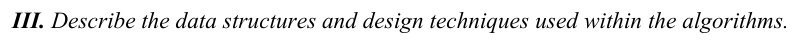

# 1. Dijkstra's Algorithm
**Data Structures:**

*Priority Queue (Heap):*

Efficiently selects the vertex with the smallest distance (used for the greedy selection process).

*Distance Array:*

Stores the shortest known distance to each vertex from the starting vertex.

**Design Techniques:**

*Greedy Approach:*
At each step, it picks the vertex with the smallest tentative distance and relaxes its neighbors.

# 2. Bellman-Ford Algorithm
**Data Structures:**

*Distance Array: *

Stores the shortest known distance to each vertex from the starting vertex.

**Design Techniques:**

*Dynamic Programming: *

Repeatedly relaxes all edges to update shortest distances, allowing it to handle negative-weight edges.

# 3. A* Algorithm
**Data Structures:**

*Priority Queue (Heap):*

Maintains nodes to explore, sorted by the estimated total cost (f = g + h).

*Heuristic Function:*

Approximates the cost from the current node to the goal (e.g., Manhattan distance for grids).

**Design Techniques:**

*Greedy Best-First Search with Heuristics:*

Combines actual cost (g) and heuristic cost (h) to guide the search toward the goal efficiently.

*Path Reconstruction:*

Uses backtracking via the came_from dictionary to reconstruct the path after reaching the goal.